<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Treinamento_TensorFlow/TF_pjt_2_Previs%C3%A3o_Vendas_Sorvete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação das libs**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.13.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importando os dados**

In [3]:
sales_df = pd.read_csv('/content/sample_data/SalesData.csv')
sales_df.reset_index(drop = True, inplace = True) # retirando a coluna de índice da tabela

In [4]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


**Visualizando os dados**

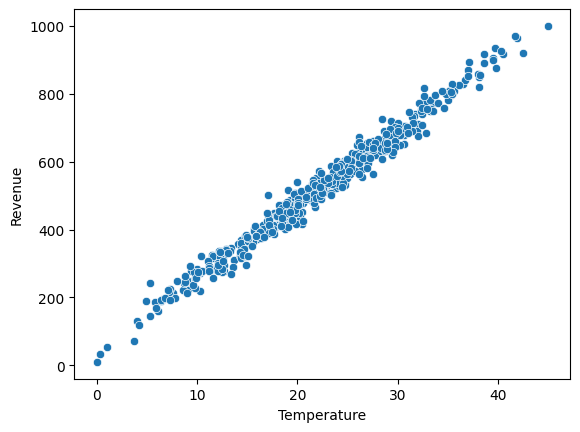

In [7]:
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue']); # o ";" tira as informações do gráfico montado

**Configuração da base de dados de treino**

In [8]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [9]:
X_train.shape

(500,)

In [10]:
y_train.shape

(500,)

**Criação e Construção do Modelo**

In [23]:
model_1 = tf.keras.Sequential() # construção de uma sequência de de camadas
''' Dense -> todos os nós da camada estão conectados com todos os nós da camada seguinte;
    units -> número de saídas(output) da rede neural;
    input_shape -> número de entradas(input) da rede neural;
'''
model_1.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Os 2 parâmetros(Param) indicam os dois pesos da adicionados no nó. O peso(w1) do input e o Bias(viés).

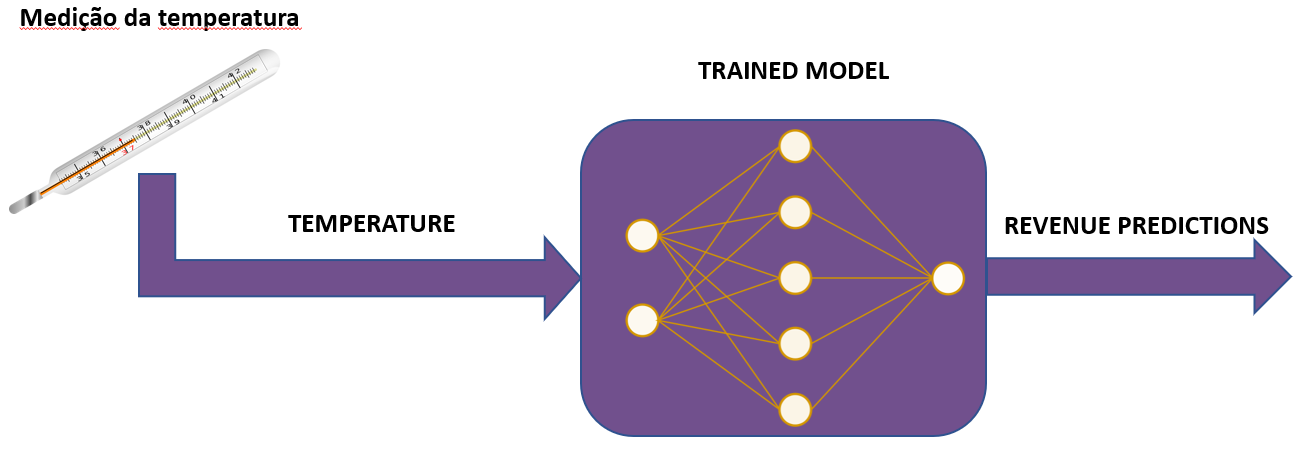

In [24]:
'''
  O algoritmo usado será o de descida de gradiente -> Adam. Com o parâmetro de 0.1, que indica o quão rápido o algoritmo irá aprender.
  Será implementado a função de erro(loss) para avaliar a diferença(erro) entre o valor real(ideal) da fórmula e o previsto pela rede(modelo) treinada.
  Como avaliação do erro será usado o "Erro Médio Quadrático".
'''
model_1.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
# Será um loop de 1000 repetições de aprendizado da rede neural para estabelecer os melhores pesos (w1 e Bias)
epochs_hist_1 = model_1.fit(X_train, y_train, epochs = 1000) # histórico de treinamento

O último valor de Erro para o modelo 1 é 628.1216

In [26]:
epochs_hist_1.history.keys()

dict_keys(['loss'])

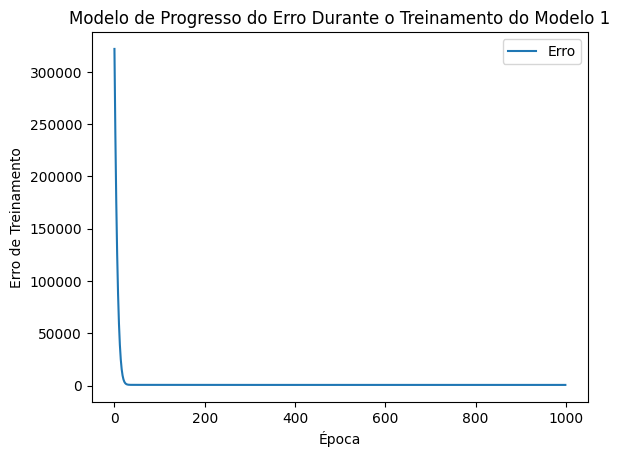

In [59]:
plt.plot(epochs_hist_1.history['loss'], label = 'Erro')
plt.title('Modelo de Progresso do Erro Durante o Treinamento do Modelo 1')
plt.xlabel('Época')
plt.ylabel('Erro de Treinamento')
plt.legend();

É possível obs que mesmo com um número grande de loop de treinamento o Erro(loss) permanece alto (por volta de 631) e de forma estacionária. Portanto, pode ser o número de camadas não seja suficiente para o aprendizado do modelo da rede neural. Assim, será add mais camadas escondidas para aprimorar o treinamento do modelo.

In [28]:
model_2 = tf.keras.Sequential() # construção de uma sequência de de camadas
''' Dense -> todos os nós da camada estão conectados com todos os nós da camada seguinte;
    units -> número de saídas(output) da rede neural;
    input_shape -> número de entradas(input) da rede neural;
'''
'''
  1 Entrada -> camada com 10 nós -> 1 saída
    (input)     (camada oculta)     (output)
(input_shape)      (units=10)      (units=1)
 '''
model_2.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model_2.add(tf.keras.layers.Dense(units = 1))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
'''
  O algoritmo usado será o de descida de gradiente -> Adam. Com o parâmetro de 0.1, que indica o quão rápido o algoritmo irá aprender.
  Será implementado a função de erro(loss) para avaliar a diferença(erro) entre o valor real(ideal) da fórmula e o previsto pela rede(modelo) treinada.
  Como avaliação do erro será usado o "Erro Médio Quadrático".
'''
model_2.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
# Será um loop de 1000 repetições de aprendizado da rede neural para estabelecer os melhores pesos (w1 e Bias)
epochs_hist_2 = model_2.fit(X_train, y_train, epochs = 1000) # histórico de treinamento

O último valor de Erro para o modelo 2 é de 646.7512

**Avaliação do modelo**

In [31]:
epochs_hist_2.history.keys()

dict_keys(['loss'])

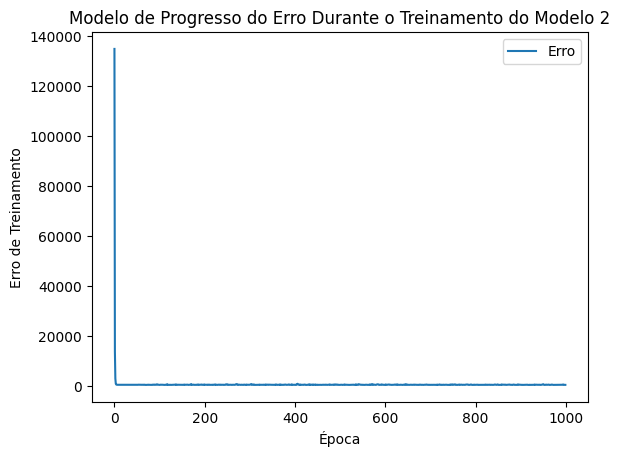

In [58]:
plt.plot(epochs_hist_2.history['loss'], label = 'Erro')
plt.title('Modelo de Progresso do Erro Durante o Treinamento do Modelo 2')
plt.xlabel('Época')
plt.ylabel('Erro de Treinamento')
plt.legend();

In [33]:
model_2.get_weights()

[array([[ 6.2252738e-02,  1.1387567e-02,  6.2304024e-02,  3.9642189e+00,
          7.0102874e-04, -2.1802196e-02, -1.0165328e-02, -1.8309946e+00,
         -1.6235258e-02,  1.3352796e+00]], dtype=float32),
 array([-1.5114533 , -0.2482916 , -1.5627576 ,  5.446765  , -0.01413534,
         0.49966955, -0.03266156, -3.4860604 ,  0.32289708,  2.9604056 ],
       dtype=float32),
 array([[-1.3886082e-02],
        [-2.9251387e-03],
        [ 6.7463331e-04],
        [ 3.9892867e+00],
        [-1.6277964e-04],
        [ 5.8328533e-03],
        [ 1.3044605e-02],
        [-1.9045171e+00],
        [ 3.6891534e-03],
        [ 1.3874785e+00]], dtype=float32),
 array([11.482817], dtype=float32)]

**Previsão com o modelo 2 treinado**

In [35]:
temp = 5
revenue = model_2.predict([temp])
print('Revenue Predictions Using Trained ANN = ', revenue)

1/1 [==============================] - 0s 61ms/step
Revenue Predictions Using Trained ANN =  [[149.74794]]


**Visualizando a Regressão Linear p/ o modelo 2**

16/16 [==============================] - 0s 2ms/step


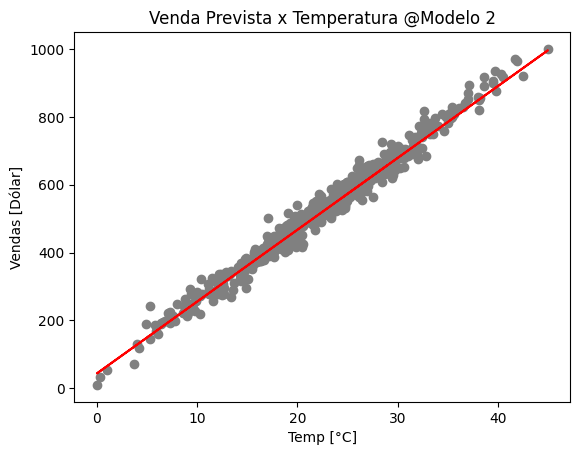

In [42]:
plt.scatter(x = X_train, y = y_train, color = 'gray')
plt.plot(X_train, model_2.predict(X_train), color = 'red')
plt.ylabel('Vendas [Dólar]')
plt.xlabel('Temp [°C]')
plt.title('Venda Prevista x Temperatura @Modelo 2');

Será feita uma nova tentativa de add de camada de nós para ver se há uma diminuíção no Erro no modelo de treinamento

In [37]:
model_3 = tf.keras.Sequential() # construção de uma sequência de de camadas
''' Dense -> todos os nós da camada estão conectados com todos os nós da camada seguinte;
    units -> número de saídas(output) da rede neural;
    input_shape -> número de entradas(input) da rede neural;
'''
'''
  1 Entrada -> camada com 10 nós -> camada com 10 nós -> 1 saída
    (input)     (camada oculta)      (camada oculta)    (output)
(input_shape)      (units=10)          (units=10)      (units=1)
 '''
model_3.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model_3.add(tf.keras.layers.Dense(units = 10))
model_3.add(tf.keras.layers.Dense(units = 1))
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
'''
  O algoritmo usado será o de descida de gradiente -> Adam. Com o parâmetro de 0.1, que indica o quão rápido o algoritmo irá aprender.
  Será implementado a função de erro(loss) para avaliar a diferença(erro) entre o valor real(ideal) da fórmula e o previsto pela rede(modelo) treinada.
  Como avaliação do erro será usado o "Erro Médio Quadrático".
'''
model_3.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
# Será um loop de 1000 repetições de aprendizado da rede neural para estabelecer os melhores pesos (w1 e Bias)
epochs_hist_3 = model_3.fit(X_train, y_train, epochs = 1000) # histórico de treinamento

O modelo teve uma piora na taxa de Erro de treinamento, visto que o mesmo levou um tempo maior para estabilizar, além de oscilar em um valor maior que o Erro apresentado pelo modelo 2. ~ 752

In [40]:
epochs_hist_3.history.keys()

dict_keys(['loss'])

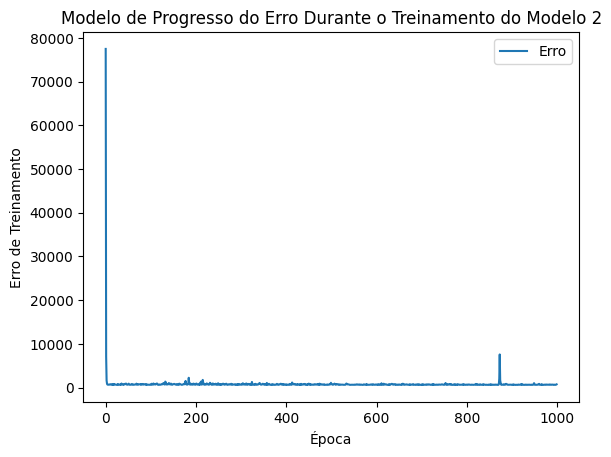

In [57]:
plt.plot(epochs_hist_3.history['loss'], label = 'Erro')
plt.title('Modelo de Progresso do Erro Durante o Treinamento do Modelo 2')
plt.xlabel('Época')
plt.ylabel('Erro de Treinamento')
plt.legend();

**Visualizando a Regressão Linear p/ o modelo 3**

16/16 [==============================] - 0s 5ms/step


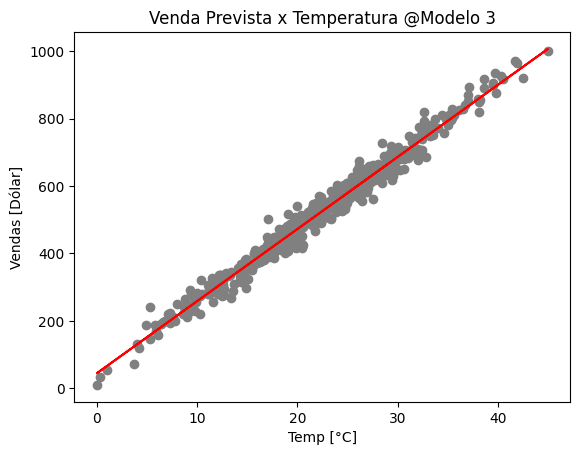

In [43]:
plt.scatter(x = X_train, y = y_train, color = 'gray')
plt.plot(X_train, model_3.predict(X_train), color = 'red')
plt.ylabel('Vendas [Dólar]')
plt.xlabel('Temp [°C]')
plt.title('Venda Prevista x Temperatura @Modelo 3');

**Buscando a Regressão através de modelos de aprendizado de máquina da lib SKLearn**

Fazendo a validação do modelo de redes neurais

In [44]:
X_train.shape

(500,)

A priori, a variável X_train não está no formato de matriz. Para utilizar os pacotes da lib de machine learning SKLearn é necessário remodelar as variáveis para que fiquem no formato de matrizes.

In [45]:
# Copiando a variável X_train para uma nova variável que será usadada nos modelos de ML do SK
X_train_SK = X_train.copy()

In [46]:
X_train_SK = X_train_SK.values.reshape(-1, 1)

In [48]:
X_train_SK.shape

(500, 1)

In [49]:
# Copiando a variável y_train para uma nova variável que será usadada nos modelos de ML do SK
y_train_SK = y_train.copy()

In [50]:
y_train_SK = y_train_SK.values.reshape(-1, 1)

In [51]:
y_train_SK.shape

(500, 1)

**Importando a Lib do SKLearn**

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
regressor = LinearRegression()
regressor.fit(X_train_SK, y_train_SK)

LinearRegression()

Coeficiente Angular da Reta

In [54]:
regressor.coef_

array([[21.44362551]])

Intercepto da Reta

In [55]:
regressor.intercept_

array([44.83126709])

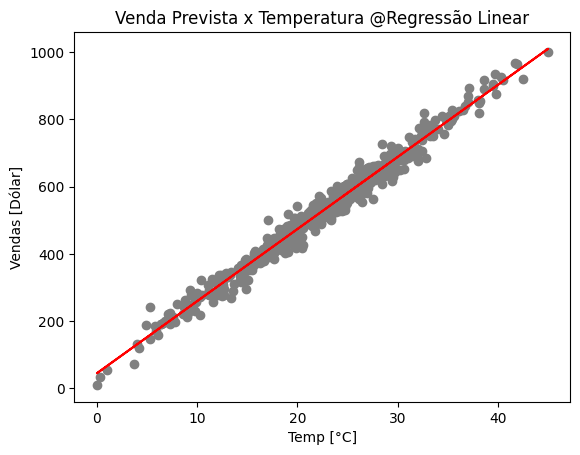

In [56]:
plt.scatter(x = X_train_SK, y = y_train_SK, color = 'gray')
plt.plot(X_train_SK, regressor.predict(X_train_SK), color = 'red')
plt.ylabel('Vendas [Dólar]')
plt.xlabel('Temp [°C]')
plt.title('Venda Prevista x Temperatura @Regressão Linear');